In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
np.set_printoptions(precision=2)

In [2]:
x = [-2, -1, 0, 1, 2]
y = [4, 1, 0, 1, 4]

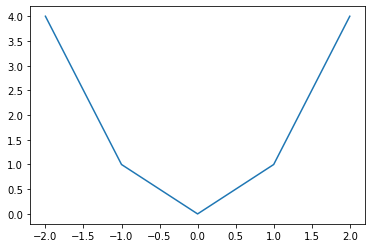

In [3]:
plt.plot(x,y)

In [6]:
!chcp 65001

Active code page: 65001


In [7]:
!ping 8.8.8.8


Pinging 8.8.8.8 with 32 bytes of data:
Reply from 8.8.8.8: bytes=32 time=18ms TTL=60
Reply from 8.8.8.8: bytes=32 time=18ms TTL=60
Reply from 8.8.8.8: bytes=32 time=18ms TTL=60
Reply from 8.8.8.8: bytes=32 time=18ms TTL=60

Ping statistics for 8.8.8.8:
    Packets: Sent = 4, Received = 4, Lost = 0 (0% loss),
Approximate round trip times in milli-seconds:
    Minimum = 18ms, Maximum = 18ms, Average = 18ms


In [2]:
import pandas as pd

In [6]:
data = pd.read_csv('./data/beauty.csv', sep=';')

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [9]:
data.shape

(1260, 10)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      1260 non-null   float64
 1   exper     1260 non-null   int64  
 2   union     1260 non-null   int64  
 3   goodhlth  1260 non-null   int64  
 4   black     1260 non-null   int64  
 5   female    1260 non-null   int64  
 6   married   1260 non-null   int64  
 7   service   1260 non-null   int64  
 8   educ      1260 non-null   int64  
 9   looks     1260 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 98.6 KB


In [11]:
data.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


In [15]:
data['exper'].head()

0    30
1    28
2    35
3    38
4    27
Name: exper, dtype: int64

# loc и iloc

In [21]:
data.loc[0:5, ['wage', 'female']]

,wage,female
0,5.73,1
1,4.28,1
2,7.96,1
3,11.57,0
4,11.42,0
5,3.91,1


In [23]:
data.iloc[:,2:4].head()

,union,goodhlth
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [28]:
data[data['female'] == 1]['wage'].mean(), \
data[data['female'] == 0]['wage'].mean()

(4.299357798165136, 7.3688228155339734)

In [32]:
data[(data['female'] == 0) & (data['married'] == 1)]['wage'].median(), \
data[(data['female'] == 0) & (data['married'] == 0)]['wage'].median()

(6.710000000000001, 5.0649999999999995)

In [49]:
for look, sub_df in data.groupby(['looks', 'female']):
    print(look)

#   print(sub_df['female'].mean())

(1, 0)
(1, 1)
(2, 0)
(2, 1)
(3, 0)
(3, 1)
(4, 0)
(4, 1)
(5, 0)
(5, 1)


In [51]:
data.groupby('looks')[['wage', 'exper']].agg(np.median)

,wage,exper
looks,,
1,3.460,32.0
2,4.595,18.0
3,5.635,18.0
4,5.240,12.5
5,4.810,8.0


In [53]:
pd.crosstab(data['female'], data['married'])

married,0,1
female,,
0,166,658
1,223,213


In [54]:
pd.crosstab(data['female'], data['looks'])

looks,1,2,3,4,5
female,,,,,
0,8,88,489,228,11
1,5,54,233,136,8


In [55]:
data['wage'].describe()

count    1260.000000
mean        6.306690
std         4.660639
min         1.020000
25%         3.707500
50%         5.300000
75%         7.695000
max        77.720000
Name: wage, dtype: float64

In [64]:
data['is_rich'] = (data['wage'] > data['wage'].quantile(.75)).astype('int64')

In [65]:
data.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks,is_rich
0,5.73,30,0,1,0,1,1,1,14,4,0
1,4.28,28,0,1,0,1,1,0,12,3,0
2,7.96,35,0,1,0,1,0,0,10,4,1
3,11.57,38,0,1,0,0,1,1,16,3,1
4,11.42,27,0,1,0,0,1,0,16,3,1


In [67]:
data['rubbish'] = .56 * data['wage'] + 0.32 * data['exper']

In [70]:
def string_gender(female):
    return 'female' if female else 'male'

In [73]:
d = {1: 'union', 0: 'non-union'}

In [74]:
data['union'].map(d).head()

0    non-union
1    non-union
2    non-union
3    non-union
4    non-union
Name: union, dtype: object

In [72]:
data['female'].apply(lambda female: 'female' if female else 'male')

0       female
1       female
2       female
3         male
4         male
         ...  
1255    female
1256    female
1257    female
1258    female
1259    female
Name: female, Length: 1260, dtype: object